In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

from bokeh.io import show, save, output_notebook, output_file
from bokeh.plotting import figure
from bokeh.models import HoverTool, ColumnDataSource

In [2]:
teams_dict_reader = csv.DictReader(open('./teams.csv'))
teams_dict = {row['teamID']: row['teamName'] for row in teams_dict_reader}

In [3]:
teams_dict

{'878c1bf6-0d21-4659-bfee-916c8314d69c': 'Unlimited Tacos',
 'b024e975-1c4a-4575-8936-a3754a08806a': 'Dallas Steaks',
 'adc5b394-8f76-416d-9ce9-813706877b84': 'Kansas City Breath Mints',
 '3f8bbb15-61c0-4e3f-8e4a-907a5fb1565e': 'Boston Flowers',
 '7966eb04-efcc-499b-8f03-d13916330531': 'Yellowstone Magic',
 'ca3f1c8c-c025-4d8e-8eef-5be6accbeb16': 'Chicago Firefighters',
 'bfd38797-8404-4b38-8b82-341da28b1f83': 'Charleston Shoe Thieves',
 '36569151-a2fb-43c1-9df7-2df512424c82': 'New York Millennials',
 '979aee4a-6d80-4863-bf1c-ee1a78e06024': "Hawai'i Fridays",
 'b72f3061-f573-40d7-832a-5ad475bd7909': 'San Francisco Lovers',
 '23e4cbc1-e9cd-47fa-a35b-bfa06f726cb7': 'Philly Pies',
 '8d87c468-699a-47a8-b40d-cfb73a5660ad': 'Baltimore Crabs',
 'f02aeae2-5e6a-4098-9842-02d2273f25c7': 'Hellmouth Sunbeams',
 '57ec08cc-0411-4643-b304-0e80dbc15ac7': 'Mexico City Wild Wings',
 '747b8e4a-7e50-4638-a973-ea7950a3e739': 'Hades Tigers',
 '9debc64f-74b7-4ae1-a4d6-fce0144b6ea5': 'Houston Spies',
 'eb67ae

In [4]:
ratings = pd.read_csv('./rating_data/ratings_elo_5.csv')
ratings.replace(teams_dict, inplace=True)
ratings.head()

,combined_day,season,day,teamID,rating
0,0,0,0,Unlimited Tacos,1500.0
1,0,0,0,Dallas Steaks,1500.0
2,0,0,0,Kansas City Breath Mints,1500.0
3,0,0,0,Boston Flowers,1500.0
4,0,0,0,Yellowstone Magic,1500.0


<AxesSubplot:xlabel='combined_day', ylabel='rating'>

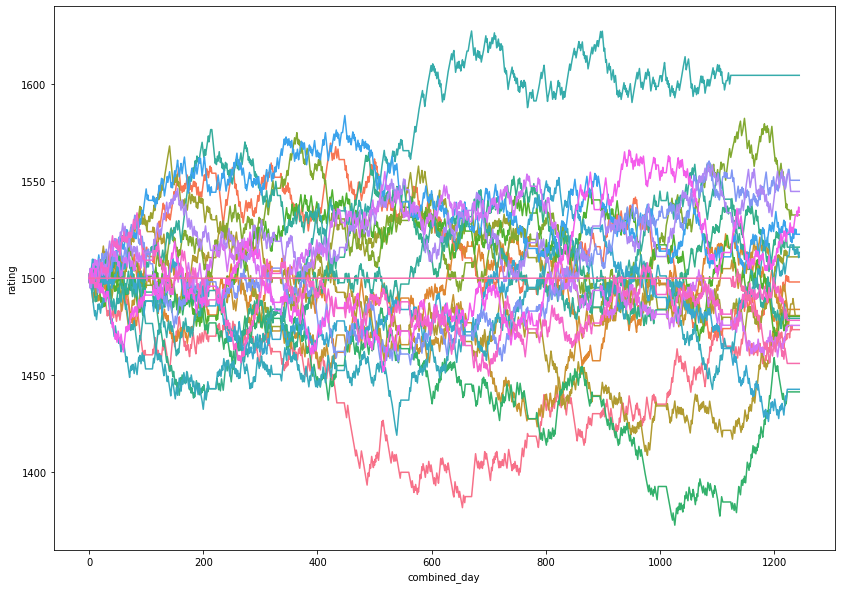

In [5]:
fig, ax = plt.subplots(figsize=(14,10))
sns.lineplot(x='combined_day', y='rating', hue='teamID', data=ratings, ax=ax, legend=False)

In [6]:
p = figure(plot_width=900, plot_height=600)

for team in teams_dict.values():
    team_rating = ratings[ratings['teamID'] == team]
    data_dict = {
        'x': team_rating['combined_day'],
        'y': team_rating['rating'],
        'post_season': ['Yes' if i > 99 else 'No' for i in team_rating['day']]
    }
    source = ColumnDataSource(data_dict)
    p.line(x='x', y='y', source=source, color='grey', alpha=0.4,
           hover_line_alpha=1.0, hover_line_color='blue', name=team)
p.add_tools(HoverTool(show_arrow=False, tooltips=[('Team', '$name'),
                                                  ('Rating', '@y{0,0.0}'),
                                                  ('Post-season', '@post_season')]))

In [7]:
output_notebook()
show(p)

Loading BokehJS ...

In [8]:
output_file('EloVis.html')
save(p)

'/home/sam/code/blaseball-elo/main/EloVis.html'